## Проект: Линейные модели в машинном обучении

[yandex practicum link](https://practicum.yandex.ru/learn/data-scientist/courses/de273a30-17f9-476d-8f2f-ff55c7fe17fb/sprints/197573/topics/2fdf9dfb-8a1d-463d-9695-4a95fc16cdcf/lessons/6871f4e2-79b3-4902-975f-f5760c64b759/)

### Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». <font color='red'>Он хочет купить бурёнок, чтобы расширить поголовье стада коров.</font>  Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы <font color='red'>каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. </font> А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать <font color='green'>**две прогнозные модели**</font>  для отбора бурёнок в поголовье:
1) Первая будет прогнозировать возможный удой коровы (<font color='red'>целевой признак Удой</font>);

2) Вторая — рассчитывать вероятность получить вкусное молоко от коровы (<font color='red'>целевой признак Вкус молока</font>).

С помощью модели нужно отобрать коров по двум критериям:
- <font color='red'>средний удой за год — не менее 6000 килограммов;</font>
- <font color='red'>молоко должно быть вкусным.</font>

### Описание данных

Файл ferma_main

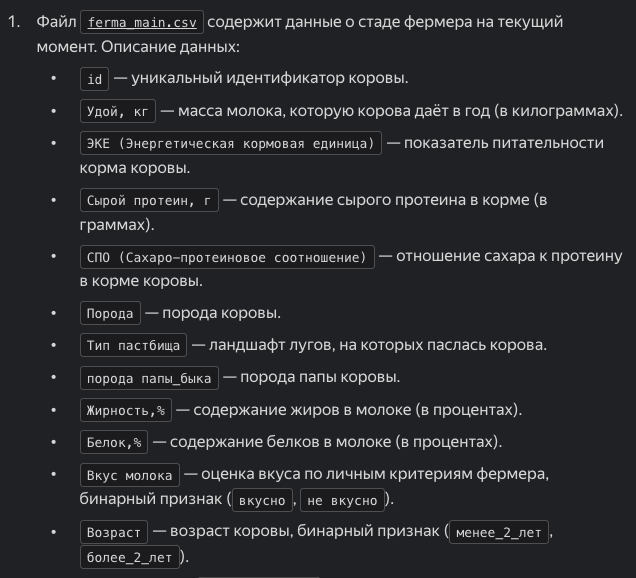

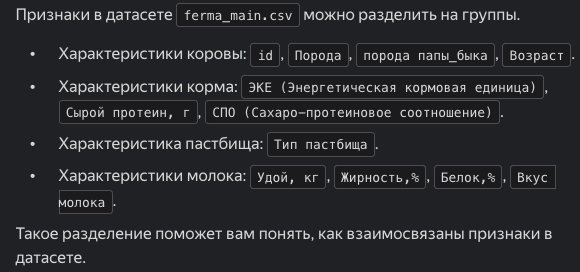

Файлы ferma_dad и cow_buy

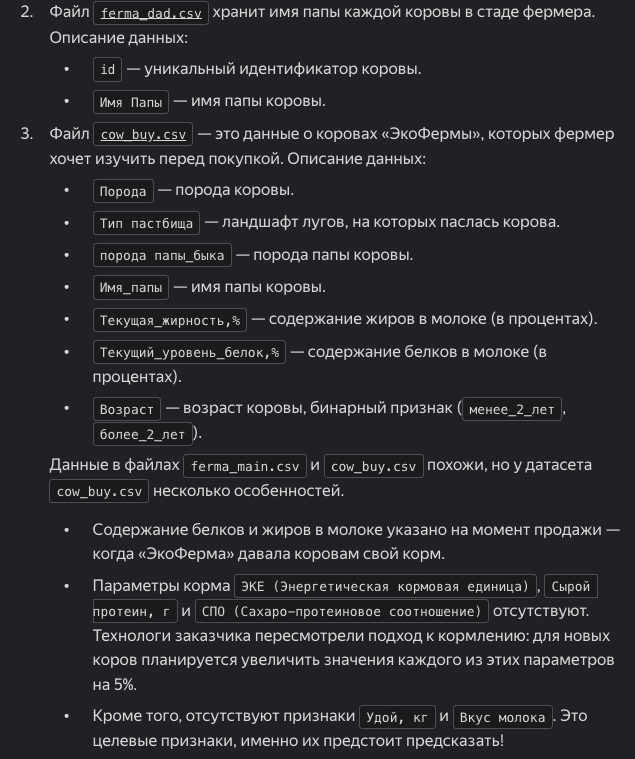

### Шаг 1. Загрузка и изучение данных

In [1]:
# библиотеки для работы с данными
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import random

# бибилотеки для подготовки данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# библиотеки для линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# библиотеки для логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


In [18]:
try:
    ferma_df = pd.read_csv('/datasets/ferma_main.csv', sep=';')
    ferma_dad_df= pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    cow_buy_df = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except FileNotFoundError:
    ferma_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/ferma_main.csv', sep=';')
    ferma_dad_df= pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/ferma_dad.csv', sep=';')
    cow_buy_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/cow_buy.csv', sep=';')

#### Основной датасет по коровам

In [6]:
ferma_df.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [7]:
ferma_df.shape

(634, 12)

In [16]:
ferma_df.id.nunique()

629

Так, строк в датасете 634, а коров - 629. Значит id 5 коров повторяются. Запомнили

Поменяем название столбцов:
- переведем на английский
- устраним пробелы

In [21]:
ferma_df.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [24]:
ferma_df.rename(columns={
                        'Удой, кг':'milk_yield_kg',
                        'ЭКЕ (Энергетическая кормовая единица)':'energy_feed_unity',
                        'Сырой протеин, г': 'crude_protein_g',
                        'СПО (Сахаро-протеиновое соотношение)':'sugar_protein_ratio',
                        'Порода':'cow_breed',
                        'Тип пастбища':'pasture_type',
                        'порода папы_быка':'bull_breed',
                        'Жирность,%': 'milk_fat_percent',
                        'Белок,%' : 'percent_protein_in_milk',
                        'Вкус молока': 'milk_taste',
                        'Возраст':'cow_age'
                    
}, inplace=True)

In [25]:
ferma_df.head()

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,milk_taste,cow_age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


#### Датасет по связи коров с быками (кто отец коровы)

In [10]:
ferma_dad_df.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [12]:
ferma_dad_df.shape

(629, 2)

Все верно, всего 629 уникальных коров, информация соответствует инфе из основного датасета

Посмотрим, сколько всего уникальных отцов-быков

In [14]:
ferma_dad_df['Имя Папы'].nunique()

4

Всего 4 быка. Посмотрим их имена

In [15]:
ferma_dad_df['Имя Папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

#### Датасет о коровах, которых планируют купить

In [19]:
cow_buy_df.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [20]:
cow_buy_df.shape

(20, 7)

всего 20 коров рассматриватся к приобретению

### Шаг 2. Предобработка данных

#### 2.1 Основной датасет по коровам

- проверить наличие пустых значений
- проверить корректность типов данных
- проверить явные и неявные дубликаты
- разбить колонку milk_taste на два столбца (1 - вкусно, 0 - не вкусно)
- разбить колонку cow_age на классы - создать несколько столбцов

##### 2.1.1 Пустые значения

In [27]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       634 non-null    int64 
 1   milk_yield_kg            634 non-null    int64 
 2   energy_feed_unity        634 non-null    object
 3   crude_protein_g          634 non-null    int64 
 4   sugar_protein_ratio      634 non-null    object
 5   cow_breed                634 non-null    object
 6   pasture_type             634 non-null    object
 7   bull_breed               634 non-null    object
 8   milk_fat_percent         634 non-null    object
 9   percent_protein_in_milk  634 non-null    object
 10  milk_taste               634 non-null    object
 11  cow_age                  634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


Пустых значений нет

##### 2.1.2 Корректность типов данных

Столбцы energy_feed_unity,sugar_protein_ratio,milk_fat_percent,percent_protein_in_milk нужно перевести в тип данных float

Причем, сами значения разделены запятой, а должны быть разделены точкой.

Используем функцию и применим к этим столбцам

In [32]:
ferma_df.energy_feed_unity\
    .apply(lambda x: float(x.replace(',','.')))

0      14.2
1      12.8
2      14.0
3      12.4
4      12.8
       ... 
629    14.4
630    14.4
631    14.4
632    14.4
633    14.4
Name: energy_feed_unity, Length: 634, dtype: float64

In [38]:
ferma_df[['energy_feed_unity', 
          'sugar_protein_ratio',
          'milk_fat_percent', 
          'percent_protein_in_milk']]\
          .apply(lambda x: x.replace(',','.'),
                 axis=0)

,energy_feed_unity,sugar_protein_ratio,milk_fat_percent,percent_protein_in_milk
0,"14,2","0,89","3,58","3,076"
1,"12,8","0,89","3,54","3,079"
2,14,"0,885","3,59","3,074"
3,"12,4","0,885","3,4","3,075"
4,"12,8","0,885","3,73","3,073"
...,...,...,...,...
629,"14,4","0,88","3,64","3,075"
630,"14,4","0,88","3,64","3,075"
631,"14,4","0,88","3,64","3,075"
632,"14,4","0,88","3,64","3,075"


In [30]:
ferma_df[['energy_feed_unity', 
          'sugar_protein_ratio',
          'milk_fat_percent', 
          'percent_protein_in_milk']]=\
ferma_df[['energy_feed_unity', 
          'sugar_protein_ratio',
          'milk_fat_percent', 
          'percent_protein_in_milk']].astype('float')

ValueError: could not convert string to float: '14,2'

In [26]:
ferma_df.head()

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,milk_taste,cow_age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [28]:
ferma_df.cow_age.unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)